In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import scipy
%matplotlib inline

In [27]:
mu1 = 6.4
var1 = 0.6

mu2 = 5.3
var2 = 0.9

In [52]:
np.random.seed(0)
df = pd.DataFrame({"male": np.random.normal(mu1, var1, 1000), "female": np.random.normal(mu2, var2, 1000)})

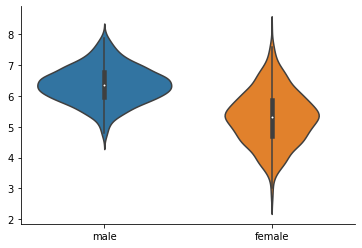

In [53]:
sns.violinplot(data=df)
sns.despine()
plt.savefig(os.path.expanduser("~/git/ml-slides/naive-bayes/violin.pdf"), transparent=True)

In [54]:
!pwd

/home/prof/git/ml2020/notebooks


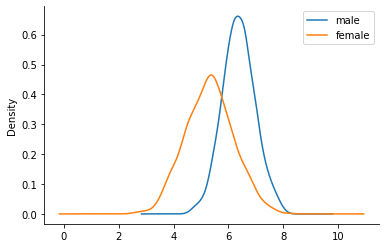

In [55]:
df.plot(kind='kde')
sns.despine()
plt.savefig(os.path.expanduser("~/git/ml-slides/naive-bayes/kde1.pdf"), transparent=True)

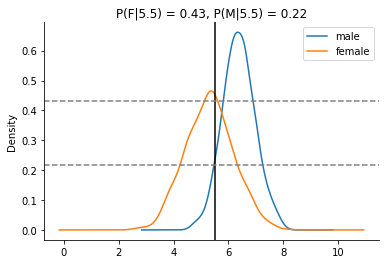

In [61]:
df.plot(kind='kde')
d1 = scipy.stats.norm(mu1, var1)
d2 = scipy.stats.norm(mu2, var2)
plt.axvline(5.5,color='k')
plt.title(f"P(F|5.5) = {d2.pdf(5.5):0.2f}, P(M|5.5) = {d1.pdf(5.5):0.2f}")
sns.despine()
plt.axhline(d2.pdf(5.5), color='grey', linestyle='--')
plt.axhline(d1.pdf(5.5), color='grey', linestyle='--')

plt.savefig(os.path.expanduser("~/git/ml-slides/naive-bayes/kde2.pdf"), transparent=True)

In [75]:
mean_2d_1 = [6, 80]
mean_2d_2 = [5.5, 65]
cov_1 = [[0.4, 0], [0, 3]]
cov_2 = [[0.2, 0], [0, 2]]

males_2d = np.random.multivariate_normal(mean_2d_1, cov_1, 1000)
females_2d = np.random.multivariate_normal(mean_2d_2, cov_2, 1000)

In [76]:
X = np.vstack((
    males_2d, females_2d)
)

y = np.zeros(2000)
y[1000:] = 1.

/home/prof/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: The following kwargs were not used by contour: 'label'


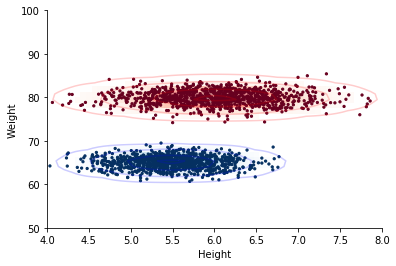

In [88]:
ffig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, s=5, cmap='RdBu')

xlim = (4, 8)
ylim = (50, 100)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2, label=label)
    
ax.set(xlim=xlim, ylim=ylim)
sns.despine()
plt.xlabel("Height")
plt.ylabel("Weight")
plt.savefig(os.path.expanduser("~/git/ml-slides/naive-bayes/kde2d.pdf"), transparent=True)

In [104]:
d_3 = scipy.stats.norm(loc = 132.5, scale = np.sqrt(558))

In [105]:
d_3.pdf(130)

0.016794255714150358

In [106]:
d_3.var()

557.9999999999999